# RFM Model
* RFM Model is the method to find out your loyal customer base.
* It give score to each customers based on there order frequency, total order cost, Last order date.
* RFM stands for Recency, Frequency, and Monetary Score
* Lower the RFM Score ,More loyal the customer is.

<!-- ![](https://thumbs.gfycat.com/GrossSphericalGerenuk-size_restricted.gif) -->
<img src="https://thumbs.gfycat.com/GrossSphericalGerenuk-size_restricted.gif" width="800">

# So here we GO :)

In [1]:
# Import all required Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# Load the data in Df usig df.read_csv.
df=pd.read_csv('/kaggle/input/ecommerce-customerssales-record/Sales.csv')
df.head()

,index,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,0,2354,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,1,2361,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,2,2415,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,3,2427,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,4,2456,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [3]:
# WE store the parameters used in RFM analysis in new dataset
Rtl_data=df[['CustomerID','TOTAL_ORDERS','REVENUE','LATEST_ORDER_DATE','AVGDAYSBETWEENORDERS']]

In [4]:
Rtl_data.head()

,CustomerID,TOTAL_ORDERS,REVENUE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS
0,2354,124,11986.54,2021-10-24,14.19
1,2361,82,11025.96,2021-10-24,15.89
2,2415,43,7259.69,2021-10-24,33.12
3,2427,44,6992.27,2021-10-24,21.11
4,2456,55,6263.44,2021-10-24,6.65


In [5]:
Rtl_data.max()

CustomerID                  279492
TOTAL_ORDERS                   156
REVENUE                    34847.4
LATEST_ORDER_DATE       2021-10-24
AVGDAYSBETWEENORDERS        1409.5
dtype: object

# RFM Score (Recency, Frequency, and Monetary Score)
* Recency means when the last time you bought something from the site
* Frequency means how frequently you buy something from the site
* Monetary means how revenue is being generated by you

We give scores for all three category and add them together, This is called RFM score

**Highet RFM Score means customer is more loyal the customer is**

<img src="https://www.retailreco.com/blog/wp-content/uploads/2018/11/RFM-Analytics.jpg" width="600">

#### **For Recency: We find the difference between Lastest date and date of last purchase**
* For Example: The is is purchased my last order on 22 october and last date on the record is 24 october then  my Recency Score is (24-22)=2

####  **For Frequency: We used the the data of the column 'AVGDAYSBETWEENORDERS'. The gap between each order is called Frequency**
* For Example: The is is purchased something very week that mean my frquency of order is 1 week or 7 days so  **Frequency Score=7**

####  **For Monetary: We Calculate the Total Revenue generated by that person**
* For Example: If I bought products of worth 20,000 from myntra in my life than my Monetary is 20,000  so **Monetary Score=20,000**

In [6]:

import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2021-10-24. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2021,10,24)

#Create RFM Modelling scores for each customer
RFMScores = Rtl_data.groupby('CustomerID').agg({'LATEST_ORDER_DATE': lambda x: (Latest_Date - pd.to_datetime(x.max())).days, 'AVGDAYSBETWEENORDERS': lambda x: int(x), 'REVENUE': lambda x: int(x)})

#Convert Invoice Date into type int
RFMScores['LATEST_ORDER_DATE'] = RFMScores['LATEST_ORDER_DATE'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'LATEST_ORDER_DATE': 'Recency', 
                         'AVGDAYSBETWEENORDERS': 'Frequency', 
                         'REVENUE': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,2333,52,8,34847
1,2334,93,15,32486
2,2335,52,24,24178
3,2336,4,21,18554
4,2337,129,76,16884


# We plot each Row

# Recency Visualization

In [7]:
RFMScores.Recency.describe()

count    5000.000000
mean       86.420000
std        80.156513
min         0.000000
25%         6.000000
50%        67.000000
75%       170.250000
max       206.000000
Name: Recency, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


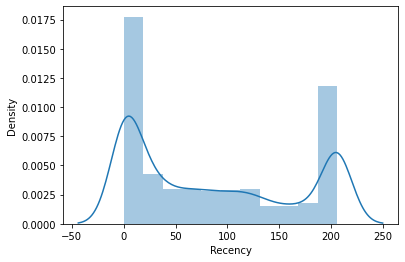

In [8]:
x = RFMScores['Recency']
ax = sns.distplot(x)

# Frequency Visualization

In [9]:
RFMScores.Frequency.describe()

count    5000.000000
mean      162.777200
std       259.703254
min         0.000000
25%        21.000000
50%        57.000000
75%       170.000000
max      1409.000000
Name: Frequency, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


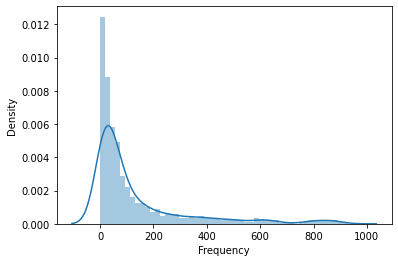

In [10]:
x = RFMScores.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)

# Monetary Visualization

In [11]:
RFMScores.Monetary.describe()

count     5000.000000
mean      1680.951600
std       1998.637336
min         38.000000
25%        315.000000
50%        966.000000
75%       2492.500000
max      34847.000000
Name: Monetary, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


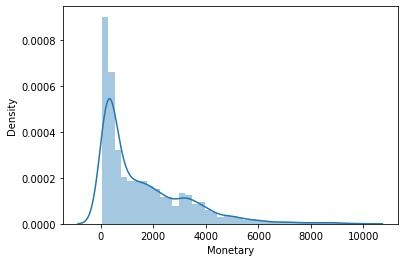

In [12]:
x = RFMScores.query('Monetary < 10000')['Monetary']

ax = sns.distplot(x)

# Dicivde the values in 4 pieces
* 0-25%
* 25%-50%
* 50%-80%
* 80%-100%
in accending order of the values


In [13]:
quantiles = RFMScores.quantile(q=[0.25,0.5,0.80])
quantiles = quantiles.to_dict()

We can see the value on each cutting point

In [14]:
quantiles

{'Recency': {0.25: 6.0, 0.5: 67.0, 0.8: 206.0},
 'Frequency': {0.25: 21.0, 0.5: 57.0, 0.8: 235.0},
 'Monetary': {0.25: 315.0, 0.5: 966.0, 0.8: 3026.2000000000003}}

# Define a function to give score ( Note: Low RFM is concidered Good)
* For exapmle For top 25% revenue Generaters will get 1 score
* next 25 % will get score of 2 and so on
* Process will be similiar for Rvenuen And Frequency... higher the value lower the score
* But but but for Recency it will be opposite.. that is lower the Recency lower the score
* becouse lower is the recency lower the score

In [15]:
# For Recency lower the value lower the score(better)
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.80]: 
        return 3
    else:
        return 4
# For Frequewncy and Monetary, higher the value lower the score( better)
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.80]: 
        return 2
    else:
        return 1

In [16]:
# Calling each function with the arguments
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2333,52,8,34847,2,4,1
2334,93,15,32486,3,4,1
2335,52,24,24178,2,3,1
2336,4,21,18554,1,4,1
2337,129,76,16884,3,2,1


## We Get the Total RFM score by adding all columns

In [17]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
2333,52,8,34847,2,4,1,241,7
2334,93,15,32486,3,4,1,341,8
2335,52,24,24178,2,3,1,231,6
2336,4,21,18554,1,4,1,141,6
2337,129,76,16884,3,2,1,321,6


## Visualization of the distribution

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


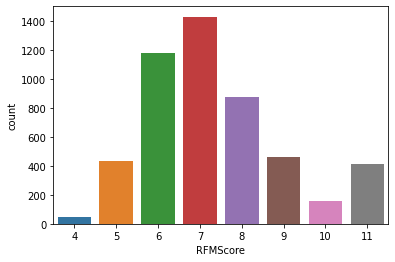

In [18]:
sns.countplot(RFMScores['RFMScore'])
plt.show()

# Lower the RFM.. More loyal user yor are
That means that having low RFM is good so we will define a function and for all users having low values we will assign them platinum badge

And for user having highest score we'll asign them Bronze Badge

In [19]:
# You can do this distribution according to you
def handel_badge(value):
    if(value>=10):
        return 'Bronze'
    elif(value>=8 and value<10):
        return 'Silver'
    elif(value>=6 and value<8):
        return 'Gold'
    else:
        return 'Platinum'

# Storing all the values in a list   
list1=RFMScores['RFMScore'].apply(handel_badge)


In [20]:
list1

CustomerID
2333        Gold
2334      Silver
2335        Gold
2336        Gold
2337        Gold
           ...  
251041      Gold
251042    Silver
261374    Silver
268356    Silver
279492      Gold
Name: RFMScore, Length: 5000, dtype: object

In [21]:
# adding that list into the dataframe
RFMScores['RFM_Loyalty_Level']=list1

In [22]:
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,2333,52,8,34847,2,4,1,241,7,Gold
1,2334,93,15,32486,3,4,1,341,8,Silver
2,2335,52,24,24178,2,3,1,231,6,Gold
3,2336,4,21,18554,1,4,1,141,6,Gold
4,2337,129,76,16884,3,2,1,321,6,Gold


In [23]:
RFMScores['RFMScore'].min()

4

# Visualization of the distribution

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


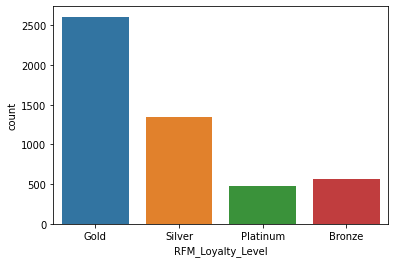

In [24]:
sns.countplot(RFMScores['RFM_Loyalty_Level'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


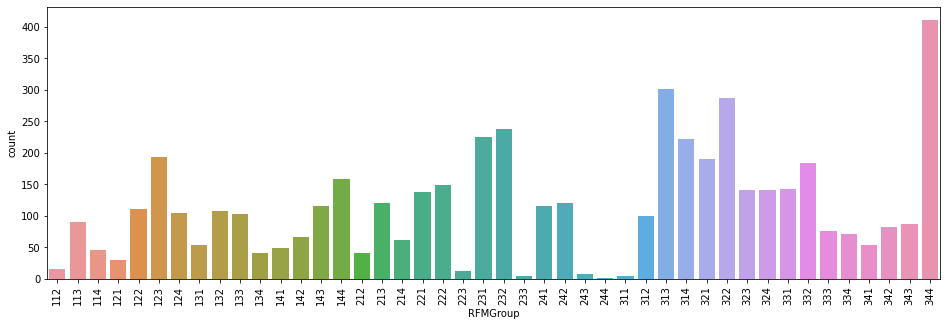

In [25]:
df2=RFMScores['RFMGroup'].sort_values(ascending=True)
plt.figure(figsize=(16,5))
sns.countplot(df2)
plt.xticks(rotation=90)
plt.show()

In [26]:
RFMScores['RFM_Loyalty_Level'].value_counts()

Gold        2608
Silver      1341
Bronze       570
Platinum     481
Name: RFM_Loyalty_Level, dtype: int64

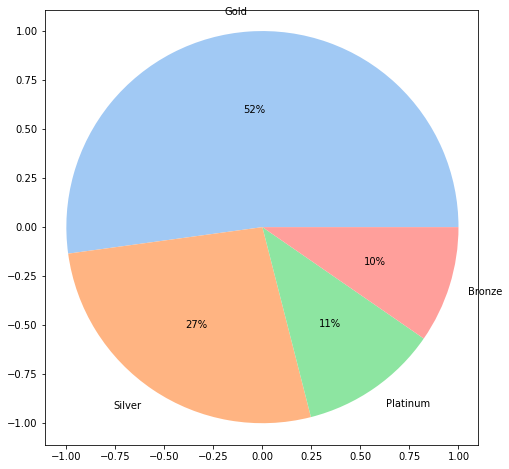

In [27]:

plt.figure(figsize=(12,8))
colors = sns.color_palette('pastel')[0:4]

plt.pie(list1.value_counts(),labels=RFMScores['RFM_Loyalty_Level'].unique(),colors = colors,frame=True,autopct='%.0f%%')
plt.show()

# Strategy For Marketing (Conclusion)
* Platinum: Platinum Users are our best users we should give them offer like free delivery as they are our regular customers, we sould retain them at any cost
* Gold: Those are the users who bought from us but are not that frequent, To bring them more we can them offeres like buy 2 get 1 free
* Silver: Those are the users who bought only in time of sales.. so we should spend more on reaching these people during time of sale
* Bronze: Those are who only visit out site to avail some coupon,, We should give them discount coupon so they visit us more

**This was all from my side You can and any doubt in the Comment**


# Thank You

![](https://66.media.tumblr.com/4bd8e6bdd5599a390cd7199a5f4d2cbd/977ca883a9c49235-a0/s1280x1920/da727bcc0d3d5590fd5c57be4a7fe59a977f4d32.gif)